In [120]:
import pandas as pd
import numpy as np

<h3>Load Dataset</h3>

In [121]:
test_df = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/AB TESTING Spanish Translation with solution/Translation_Test/test_table.csv")
user_df = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/AB TESTING Spanish Translation with solution/Translation_Test/user_table.csv")

In [122]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  int64 
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       181877 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  int64 
 8   test              453321 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [123]:
test_df["date"] = pd.to_datetime(test_df["date"])

In [124]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [125]:
test_df.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [126]:
user_df.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [127]:
print("Test table: \t Unique ID: {}\t Total ID: {}\t Match: {}".format(len(test_df["user_id"].unique()), len(test_df["user_id"]), len(test_df["user_id"].unique()) == len(test_df["user_id"])))
print("User table: \t Unique ID: {}\t Total ID: {}\t Match: {}".format(len(user_df["user_id"].unique()), len(user_df["user_id"]), len(user_df["user_id"].unique()) == len(user_df["user_id"])))

Test table: 	 Unique ID: 453321	 Total ID: 453321	 Match: True
User table: 	 Unique ID: 452867	 Total ID: 452867	 Match: True


In [128]:
#inner join
df = user_df.merge(test_df, on = "user_id", how = "inner")

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 0 to 452866
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           452867 non-null  int64         
 1   sex               452867 non-null  object        
 2   age               452867 non-null  int64         
 3   country           452867 non-null  object        
 4   date              452867 non-null  datetime64[ns]
 5   source            452867 non-null  object        
 6   device            452867 non-null  object        
 7   browser_language  452867 non-null  object        
 8   ads_channel       181693 non-null  object        
 9   browser           452867 non-null  object        
 10  conversion        452867 non-null  int64         
 11  test              452867 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 44.9+ MB


In [130]:
df.describe(include = "all")

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
count,452867.000000,452867,452867.000000,452867,452867,452867,452867,452867,181693,452867,452867.000000,452867.000000
unique,NaN,2,NaN,17,5,3,2,3,5,7,NaN,NaN
top,NaN,M,NaN,Mexico,2015-12-04 00:00:00,Ads,Web,ES,Facebook,Android_App,NaN,NaN
freq,NaN,264485,NaN,128484,141024,181693,251316,377160,68358,154977,NaN,NaN
first,NaN,NaN,NaN,NaN,2015-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2015-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,499944.805166,NaN,27.130740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049560,0.476462
std,288676.264784,NaN,6.776678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.217034,0.499446
min,1.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,249819.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000


In [131]:
for column in df.columns:
    print("{}\t unique: {}\t {}".format(column, len(df[column].unique()), df[column].unique()[:5]))

user_id	 unique: 452867	 [765821 343561 118744 987753 554597]
sex	 unique: 2	 ['M' 'F']
age	 unique: 52	 [20 27 23 29 31]
country	 unique: 17	 ['Mexico' 'Nicaragua' 'Colombia' 'Venezuela' 'Spain']
date	 unique: 5	 ['2015-12-02T00:00:00.000000000' '2015-12-04T00:00:00.000000000'
 '2015-11-30T00:00:00.000000000' '2015-12-03T00:00:00.000000000'
 '2015-12-01T00:00:00.000000000']
source	 unique: 3	 ['Ads' 'SEO' 'Direct']
device	 unique: 2	 ['Mobile' 'Web']
browser_language	 unique: 3	 ['ES' 'EN' 'Other']
ads_channel	 unique: 6	 ['Yahoo' 'Facebook' nan 'Google' 'Bing']
browser	 unique: 7	 ['Android_App' 'Safari' 'IE' 'Chrome' 'Iphone_App']
conversion	 unique: 2	 [0 1]
test	 unique: 2	 [1 0]


<h3>A/B Test</h3>

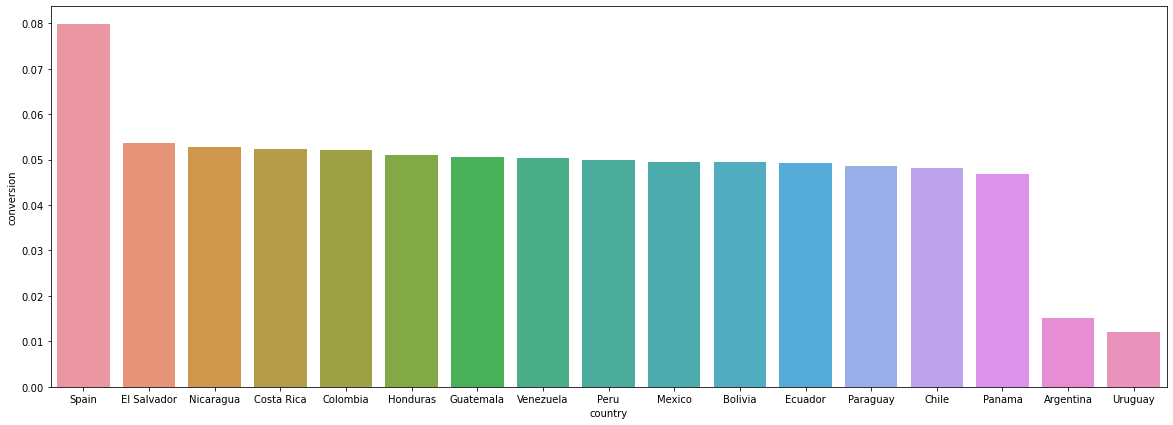

In [132]:
# check spain conversion rate
import seaborn as sns
import matplotlib.pyplot as plt

spain_check = control.groupby("country")["conversion"].mean().reset_index().sort_values("conversion", ascending = False)
fig, ax = plt.subplots(figsize = (20,7))
sns.barplot(x = "country", y = "conversion", data = spain_check)

plt.show()

In [133]:
from scipy.stats import ttest_ind

In [134]:
test_data = df[df["country"] != "Spain"]
test_val = test_data[test_data["test"] == 1]["conversion"]
control_val = test_data[test_data["test"] == 0]["conversion"]

print("test mean: {}\ncontrol mean: {}".format(np.mean(test_val), np.mean(control_val)))

test mean: 0.043411161678422794
control mean: 0.04829179055749524


In [135]:
ttest_ind(test_val, control_val, equal_var = False)

Ttest_indResult(statistic=-7.353895203080277, pvalue=1.928917857779903e-13)

The test result is too bad. The most likely reason for weird A/B test results are:
- Did not collect enough data
- Some bias has been introduced in the experiement, so the test and control people are not really random

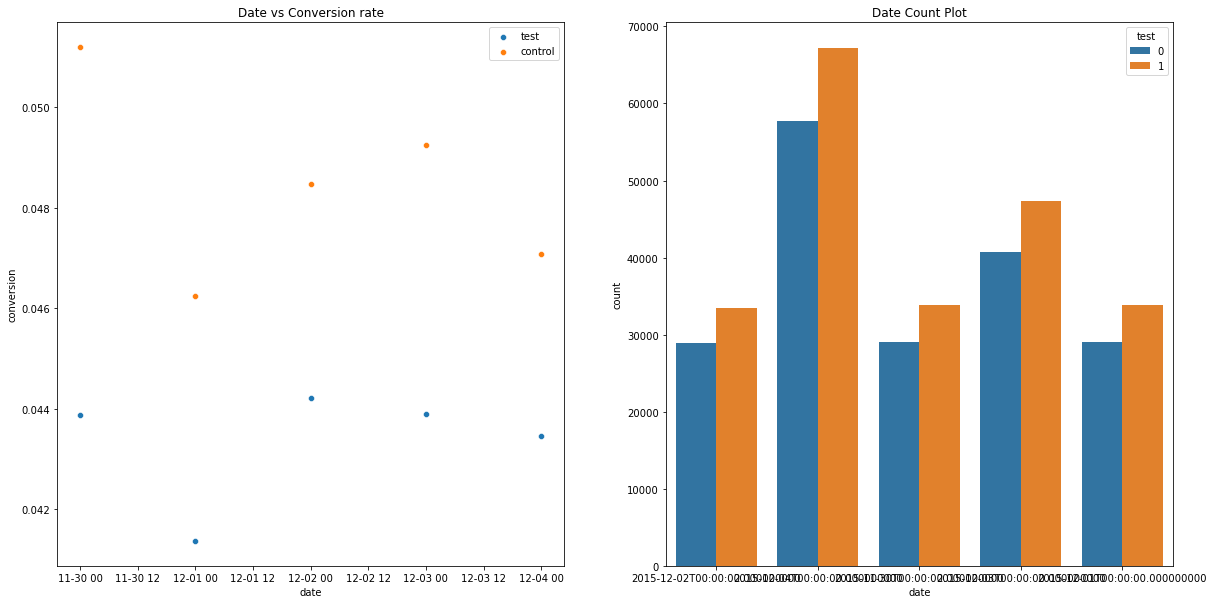

In [151]:
#Check day to day changes
test_group_bydate = test_data[test_data["test"] == 1].groupby("date")["conversion"].mean().reset_index()
control_group_bydate = test_data[test_data["test"] == 0].groupby("date")["conversion"].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(x = "date", y = "conversion", data = test_group_bydate, label = "test", ax = ax[0])
sns.scatterplot(x = "date", y = "conversion", data = control_group_bydate, label = "control", ax = ax[0])
ax[0].set_title("Date vs Conversion rate")

sns.countplot(x = "date", data = test_data, hue = "test", ax = ax[1])
ax[1].set_title("Date Count Plot")

plt.show()

- Control group always performed better than test group
- Only 5 days data avaliable

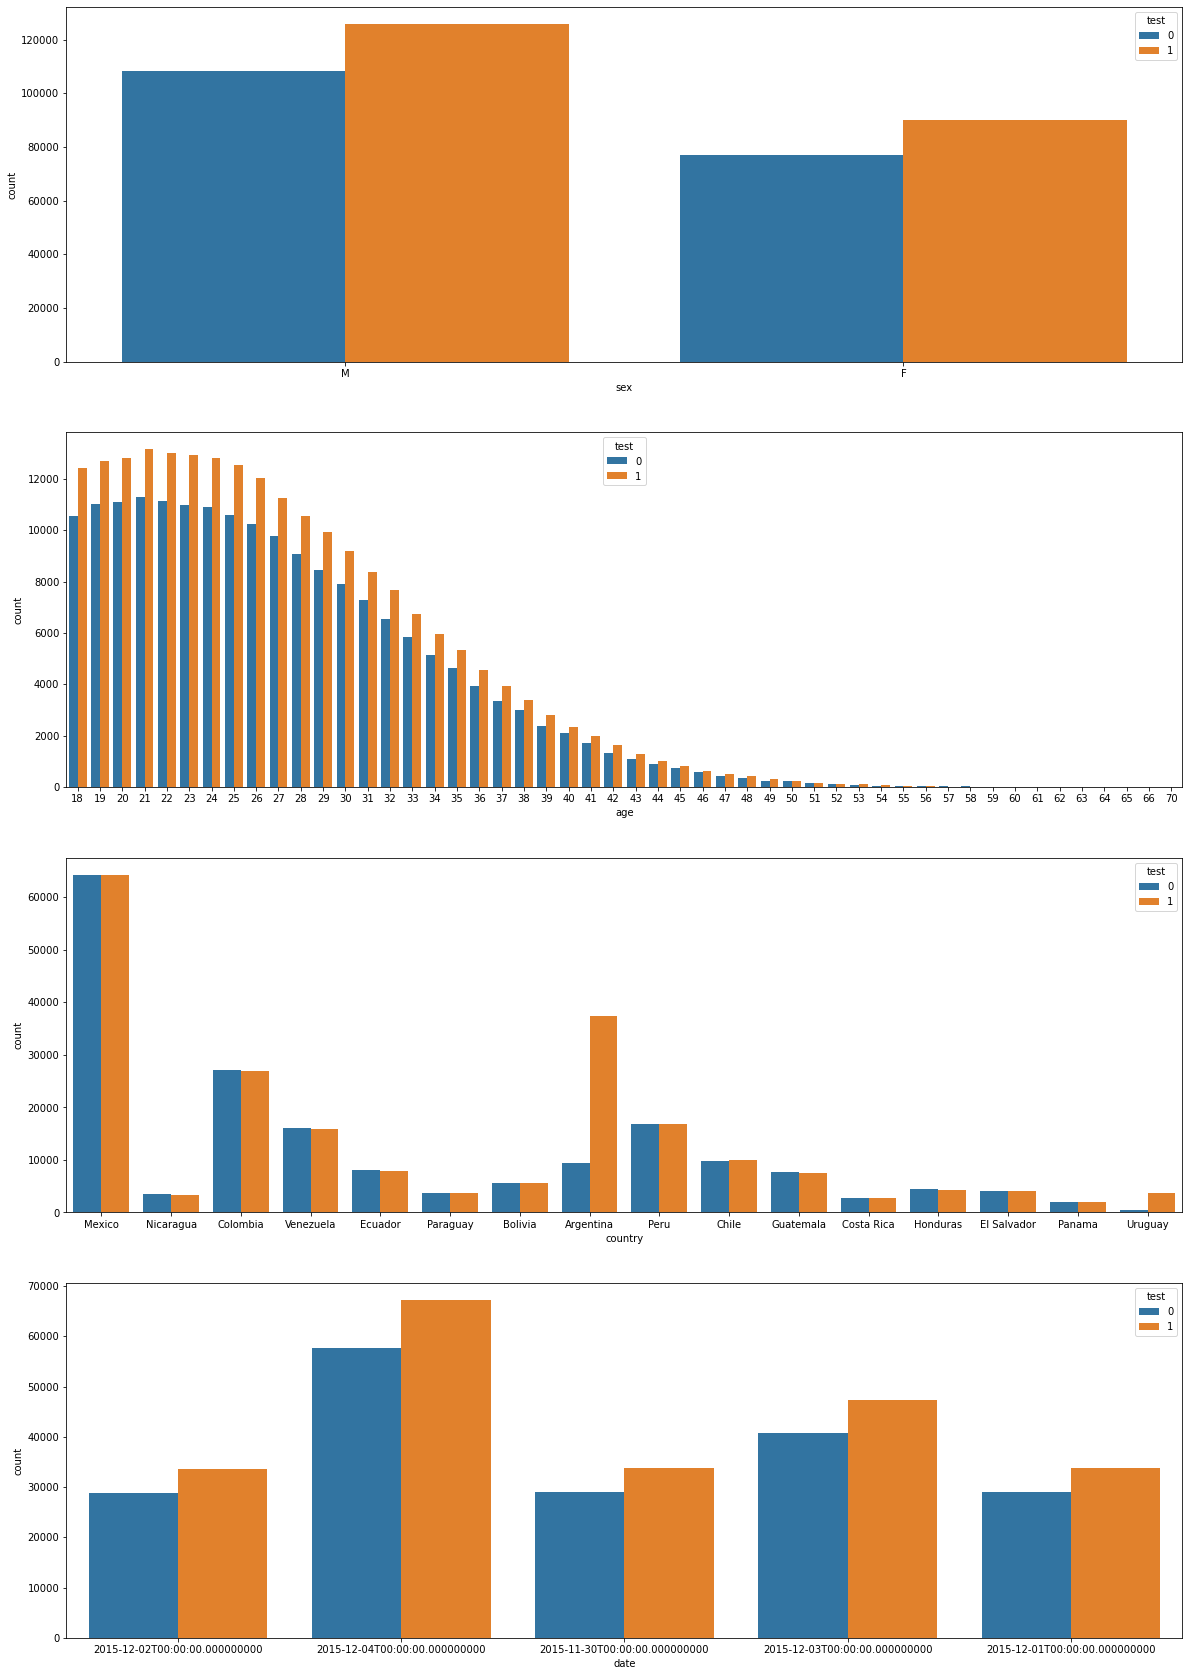

In [179]:
plotdic = {
    "sex":0,
    "age":1,
    "country":2,
    "date":3
}

fig, ax = plt.subplots(4, 1, figsize = (20,30))
for col in plotdic:
    sns.countplot(x = col, data = test_data, hue = "test", ax = ax[plotdic[col]])

<h3>redo ab test</h3>

0         0
2         0
3         0
7         0
8         0
         ..
452856    0
452858    0
452860    0
452865    0
452866    0
Name: conversion, Length: 215774, dtype: int64

In [190]:
test_data = df[(df["country"] != "Spain") & (df["country"] != "Argentina") & (df["country"] != "Uruguay")]
test_val = test_data[test_data["test"] == 1]["conversion"]
control_val = test_data[test_data["test"] == 0]["conversion"]

In [191]:
ttest_ind(test_val, control_val, equal_var = False)

Ttest_indResult(statistic=0.35834557944814466, pvalue=0.7200849282884503)